In [1]:
from detoxify import Detoxify
import pandas as pd

model = Detoxify('original', device='cpu')

c:\Users\maxim\work\ML\text_detoxification\text_detoxification_detoxify_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
toxic_comments = pd.read_csv('../data/interim/toxic_comment_classific_challenge_model_result.csv')
toxic_comments

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,comment_text,for_gpt,gpt,for_t5,t5
0,9884,NaN,NaN,NaN,NaN,1081e7bb8feb8512,hello \n\n hey jesusfreek2 im jesusfreek2 2ÐÐ...,User:hello \n\n hey jesusfreek2 im jesusfreek...,User:hello \n\n hey jesusfreek2 im jesusfreek...,Detoxify: hello \n\n hey jesusfreek2 im jesus...,"['hello, Jesus Freek2 im Jesus Freek2 - 2']"
1,9878,NaN,NaN,NaN,NaN,107ea0dc7f1cc3fe,he is a ffuckin asshole who fucked me in the ass,User:he is a ffuckin asshole who fucked me in ...,he's a guy who's got me in the bag.,Detoxify: he is a ffuckin asshole who fucked m...,"[""he's a fucking asshole who fucked me in""]"
2,9874,NaN,NaN,NaN,NaN,107d921647a7f744,"hehehehe, ganun ba?! wahaha!","User:hehehehe, ganun ba?! wahaha!\nAssistant:","oh, shit, Ganun Ba?","Detoxify: hehehehe, ganun ba?! wahaha!","['hehehe, ganun ba?']"
3,9872,NaN,NaN,NaN,NaN,107cd416ead2d8de,"OK, I'll get rid of it then.","User:OK, I'll get rid of it then.\nAssistant:","OK, I'll get rid of him.","Detoxify: OK, I'll get rid of it then.","[""OK, I'll get rid of it.""]"
4,9871,NaN,NaN,NaN,NaN,107c3ccb2abeac27,"aside from the de-wp one,","User:aside from the de-wp one,\nAssistant:","besides the de-pupil,","Detoxify: aside from the de-wp one,","['aside from the de-wp,']"
...,...,...,...,...,...,...,...,...,...,...,...
1210,510,368.0,4.0,6.0,31.0,000c9b92318552d1,Professors to the Manhatten Project.,User:Professors to the Manhatten Project.\nAss...,professor of the Manhatten Project.,Detoxify: Professors to the Manhatten Project.,['professors to the Manhatten Project.']
1211,511,369.0,3.0,5.0,19.0,000844b52dee5f3f,|blocked]] from editing Wikipedia. |,User:|blocked]] from editing Wikipedia. |\nA...,he blocked the editors from editing Wikipedia.,Detoxify: |blocked]] from editing Wikipedia. |,['a blocked from editing Wikipedia.']
1212,512,370.0,2.0,4.0,16.0,000663aff0fffc80,this other one from 1897,User:this other one from 1897\nAssistant:,this is the other one from 1897,Detoxify: this other one from 1897,['the other one from 1897.']
1213,513,371.0,1.0,3.0,7.0,000247e83dcc1211,:Dear god this site is horrible.,User::Dear god this site is horrible.\nAssistant:,"God, this is terrible.",Detoxify: :Dear god this site is horrible.,[':Dear God this site is terrible.']


In [ ]:
toxic_comments["toxicity_gpt"] = toxic_comments.apply(lambda x: model.predict(x['gpt'])['toxicity'], axis=1)

In [ ]:
toxic_comments["toxicity_t5"] = toxic_comments.apply(lambda x: model.predict(x['t5'])['toxicity'], axis=1)


In [ ]:
toxic_comments["toxicity_original"] = toxic_comments.apply(lambda x: model.predict(x['comment_text'])['toxicity'], axis=1)


In [ ]:
toxic_comments.to_csv('../data/interim/toxic_comment_classific_challenge_models_comparison.csv')

toxic_comments

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,comment_text,for_gpt,gpt,for_t5,t5,toxicity_gpt,toxicity_t5,toxicity_original
0,2414,NaN,NaN,042a85eb251d5b26,== The Avengers == \n\n Your Mum is a shemale,User:== The Avengers == \n\n Your Mum is a she...,your mom is a lesbian,Detoxify: == The Avengers == \n\n Your Mum is ...,['your mom is a shemale.'],0.983349,0.883979,0.892492
1,2412,NaN,NaN,042999c38258ba66,== fuck off ==,User:== fuck off ==\nAssistant:,get out of here!,Detoxify: == fuck off ==,['fuck off'],0.934465,0.992318,0.991340
2,2408,NaN,NaN,04282e0773ff3362,Bullshit he was a faggot,User:Bullshit he was a faggot\nAssistant:,he was a faggot,Detoxify: Bullshit he was a faggot,['he was a faggot.'],0.972371,0.887984,0.996644
3,2404,NaN,NaN,042395314d6d8991,: Article restored.,User:: Article restored.\nAssistant:,the article has been restored.,Detoxify: : Article restored.,['a copy of the article was restored.'],0.000592,0.000610,0.000643
4,2403,NaN,NaN,04238c04fc0eb527,""" This was a while ago. ""","User:"" This was a while ago. ""\nAssistant:",it was a long time ago.,"Detoxify: "" This was a while ago. ""","['""it was a while ago.']",0.000728,0.000623,0.000665
...,...,...,...,...,...,...,...,...,...,...,...,...
368,4,6.0,31.0,000c9b92318552d1,Professors to the Manhatten Project.,User:Professors to the Manhatten Project.\nAss...,professor of the Manhatten Project.,Detoxify: Professors to the Manhatten Project.,['professors to the Manhatten Project.'],0.000816,0.000657,0.000765
369,3,5.0,19.0,000844b52dee5f3f,|blocked]] from editing Wikipedia. |,User:|blocked]] from editing Wikipedia. |\nA...,he blocked the editors from editing Wikipedia.,Detoxify: |blocked]] from editing Wikipedia. |,['a blocked from editing Wikipedia.'],0.001790,0.000746,0.000798
370,2,4.0,16.0,000663aff0fffc80,this other one from 1897,User:this other one from 1897\nAssistant:,this is the other one from 1897,Detoxify: this other one from 1897,['the other one from 1897.'],0.001023,0.000621,0.000949
371,1,3.0,7.0,000247e83dcc1211,:Dear god this site is horrible.,User::Dear god this site is horrible.\nAssistant:,"God, this is terrible.",Detoxify: :Dear god this site is horrible.,[':Dear God this site is terrible.'],0.051691,0.095874,0.474604


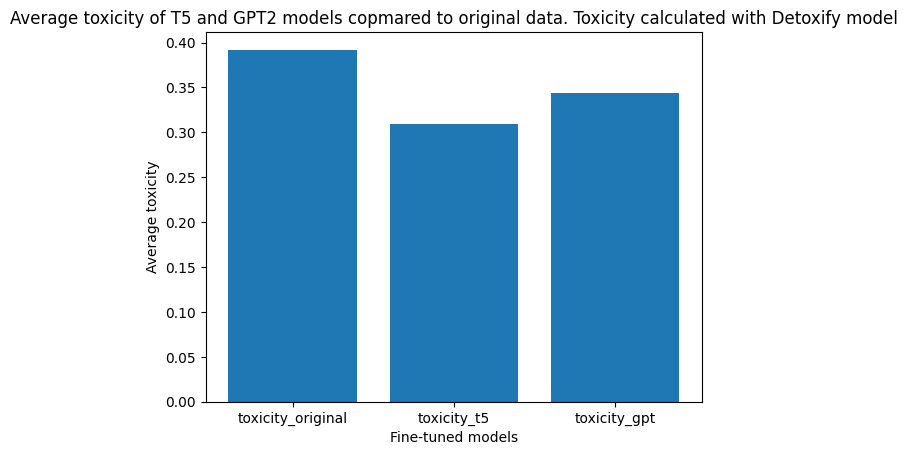

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and the three columns are 'column1', 'column2', and 'column3'
average_values = toxic_comments[['toxicity_original', 'toxicity_t5', 'toxicity_gpt']].mean()

plt.bar(average_values.index, average_values.values)
plt.xlabel('Fine-tuned models')
plt.ylabel('Average toxicity')
plt.title('Average toxicity of T5 and GPT2 models copmared to original data. Toxicity calculated with Detoxify model')
plt.show()

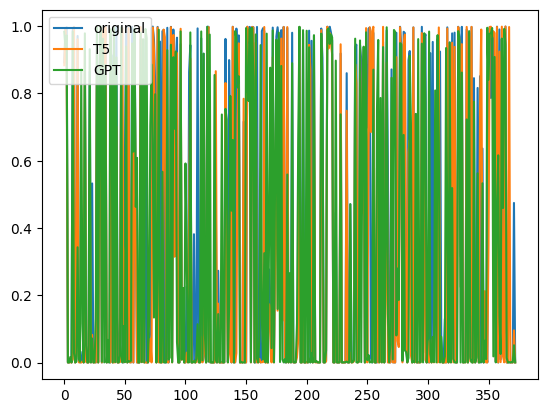

In [ ]:
plt.plot(toxic_comments['toxicity_original'], label="original")
plt.plot(toxic_comments['toxicity_t5'],label="T5")
plt.plot(toxic_comments['toxicity_gpt'], label="GPT")
plt.legend(loc="upper left")
plt.show()

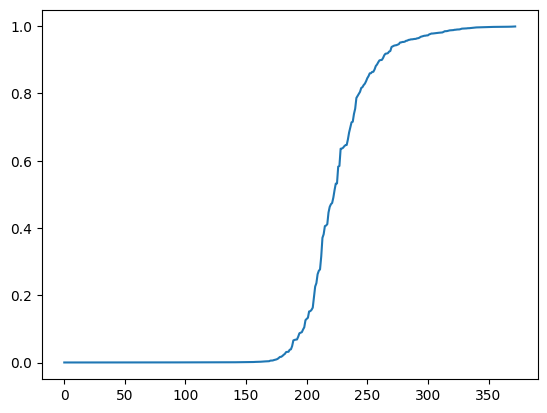

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,comment_text,for_gpt,gpt,for_t5,t5,toxicity_gpt,toxicity_t5,toxicity_original
0,1612,NaN,NaN,02be7c5ec556e6a2,":Sorry, I had already voted. Cheers,","User::Sorry, I had already voted. Cheers,\nAss...","I'm sorry, I voted for you.","Detoxify: :Sorry, I had already voted. Cheers,","[""I'm sorry, I already voted.""]",0.000651,0.000603,0.000525
1,1768,NaN,NaN,030541eba6f503de,""" \n : That's fair. Thanks for the message. ""","User:"" \n : That's fair. Thanks for the messag...",thanks for the message.,"Detoxify: "" \n : That's fair. Thanks for the m...","['""that\'s fair, thanks for the message. ""']",0.000557,0.000582,0.000537
2,1474,NaN,NaN,027ab8703fe407a1,:Thank you for explaining.,User::Thank you for explaining.\nAssistant:,thank you for explaining.,Detoxify: :Thank you for explaining.,['thank you for explaining.'],0.000531,0.000537,0.000537
3,81,106.0,530.0,00defb8436ae67f5,""" \n ::Alright. Thank you. — , ""","User:"" \n ::Alright. Thank you. — , ""\nAssi...","thank you, Mr. President.","Detoxify: "" \n ::Alright. Thank you. — , ""","['"": - Thank you. - - - - - -']",0.000577,0.000586,0.000549
4,48,68.0,354.0,00966e21a96759a4,""" \n :Support: I support the merge. ""","User:"" \n :Support: I support the merge. ""\nA...",I support the merger.,"Detoxify: "" \n :Support: I support the merge. ""","['"":Support: I support the merger.']",0.000681,0.000597,0.000557
...,...,...,...,...,...,...,...,...,...,...,...,...
368,153,213.0,1030.0,01b5e563c409eeb5,Black people suck ass,User:Black people suck ass\nAssistant:,black people are bad,Detoxify: Black people suck ass,['black people are sucking.'],0.947291,0.979566,0.998340
369,15,22.0,126.0,0031db73bf0939c3,to fuck you and ur family,User:to fuck you and ur family\nAssistant:,to get you and your family,Detoxify: to fuck you and ur family,['to fuck you and your family.'],0.446650,0.997687,0.998549
370,1984,NaN,NaN,0365feddfadd6086,dethklok kicks alot of fucking ass,User:dethklok kicks alot of fucking ass\nAssis...,Dethklok is kicking a lot of people,Detoxify: dethklok kicks alot of fucking ass,['Dethklok kicks a lot of fucking shit.'],0.666581,0.995847,0.998781
371,8,11.0,59.0,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |","User::Fuck off, you anti-semitic cunt. |\nAss...","get out, you anti-semitic.","Detoxify: :Fuck off, you anti-semitic cunt. |","['fuck off, you anti-semitic cunt.']",0.945040,0.998783,0.998827


In [ ]:
toxic_comments.sort_values(by=['toxicity_original'], inplace=True, ignore_index=True)
plt.plot(toxic_comments['toxicity_original'])
plt.show()
toxic_comments

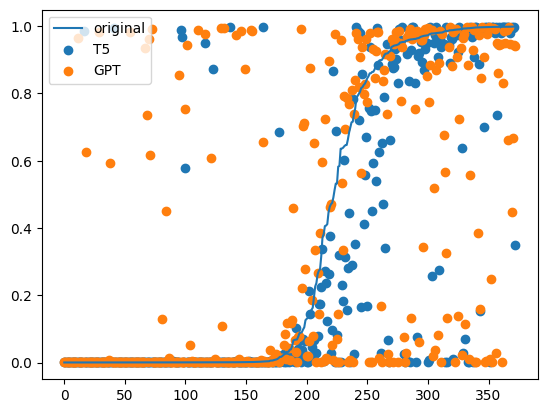

In [ ]:

plt.plot(toxic_comments['toxicity_original'], label="original")
plt.scatter(toxic_comments['toxicity_t5'].index, toxic_comments['toxicity_t5'].values,label="T5")
plt.scatter(toxic_comments['toxicity_gpt'].index, toxic_comments['toxicity_gpt'].values, label="GPT")
plt.legend(loc="upper left")
plt.show()

In [ ]:
percent_gpt = len(toxic_comments[toxic_comments['toxicity_gpt'] > toxic_comments['toxicity_original']])*100/300

In [ ]:
percent_t5 = len(toxic_comments[toxic_comments['toxicity_t5'] > toxic_comments['toxicity_original']])*100/300

In [ ]:
print(f"The GPT had more toxic prediction then the original text in {percent_gpt}% ")
print(f"The T5 had more toxic prediction then the original text in {percent_t5}%")

The GPT had more toxic prediction then the original text in 56.0% 
The T5 had more toxic prediction then the original text in 28.666666666666668%


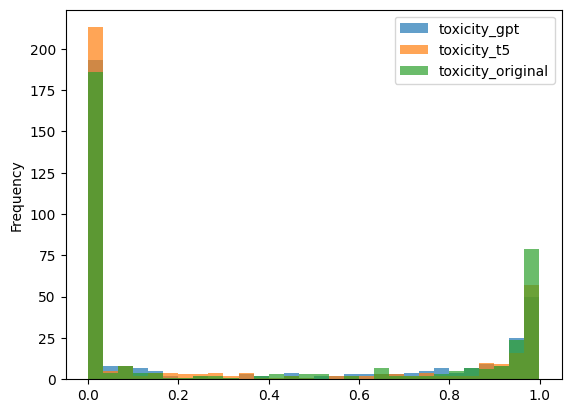

In [ ]:
models_values = toxic_comments[['toxicity_gpt', 'toxicity_t5',  'toxicity_original']]

ax = models_values.plot.hist(bins=30, alpha=0.7)
